#### A 1D simulation designed to measure the long-term behaviour of fitness in range expansions 


In [1]:
include("../resk.jl")
include("../reskplots.jl")

RESK successfully loaded.
RESKPlots successfully loaded.


Check if a shorter version with the same parameters works:

In [2]:
oneD1 = rangeexp_1d_inf(200,100,5;x_max_burnin=5,x_max_exp=85,data_to_generate="F",k_capacity=100,r_prolif_rate=2,weightfitn=false,condsel=true)#,mut_rate=0.05,migr_rate=0.05,s_sel_coef=0.005)

Dict{String, Any} with 5 entries:
  "pops"  => NaN
  "del"   => NaN
  "fitn"  => Float32[1.0 0.998776 … 0.875062 0.873372; 1.0 0.998614 … 0.871192 …
  "stats" => Dict{String, Any}("wlddim"=>1, "r_prolif_rate"=>2, "max_burnin"=>(…
  "ben"   => NaN

In [3]:
N_GENS = oneD1["stats"]["n_gens"]
N_GENS_BURNIN = oneD1["stats"]["n_gens_burnin"]
X_MAX = oneD1["stats"]["max"][1]

function timeseries_mean(obj, n_gens)
    return [mean(obj[i,:]) for i in 1:n_gens]
end

timeseries_mean (generic function with 1 method)

┌ Info: Saved animation to C:\Users\Hartree\AppData\Local\Temp\jl_ElYJkt6Pc9.gif
└ @ Plots C:\Users\Hartree\.julia\packages\Plots\ju9dp\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\Hartree\\AppData\\Local\\Temp\\jl_ElYJkt6Pc9.gif")
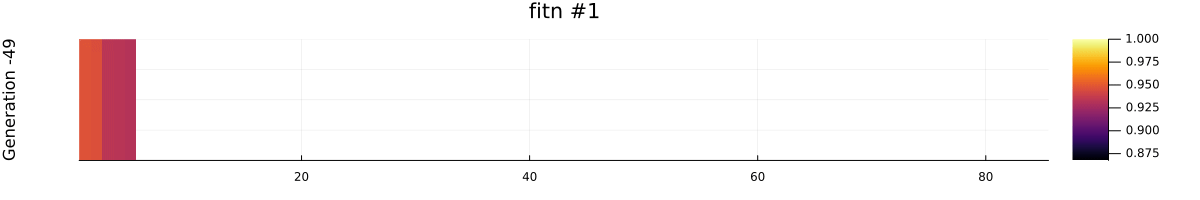

In [10]:
re_heatmap(oneD1,"fitn", N_GENS-150, N_GENS)

In [4]:
#= using JSON
write("data/1d/1.re", JSON.json(test))
oneD1 = read("data/1d/1.re", String) |> JSON.parse =#

#oneD1 = deserialize("data/1d/1.re")

In [5]:
oneD1["stats"]

Dict{String, Any} with 18 entries:
  "wlddim"            => 1
  "r_prolif_rate"     => 2
  "max_burnin"        => (5,)
  "name"              => "2024-07-24_15-16-36"
  "startfill"         => UnitRange{Int64}[1:5]
  "s_sel_coef"        => 0.002
  "n_gens_burnin"     => 1
  "k_capacity"        => 100
  "prop_of_del_muts"  => 0.9
  "migr_rate"         => 0.1
  "max"               => (500,)
  "n_segr_regions"    => 20
  "n_gens"            => 2001
  "migr_mode"         => "ort"
  "n_gens_exp"        => 2000
  "mut_rate"          => 0.7567
  "max_exp"           => (500,)
  "n_demes_startfill" => 5

In [6]:
oneD1["fitn"]

500×2001×1 Array{Float32, 3}:
[:, :, 1] =
   1.0    0.998496    0.998157    0.997317  …  0.84615   0.850305  0.852439
   1.0    0.998655    0.998155    0.99723      0.848168  0.847634  0.848475
   1.0    0.99904     0.998473    0.997875     0.857434  0.857404  0.860008
   1.0    0.99862     0.997897    0.997027     0.866894  0.867668  0.865472
   1.0    0.998761    0.998181    0.997798     0.866478  0.868558  0.865497
 NaN    NaN           0.998286    0.998126  …  0.867399  0.866054  0.870461
 NaN    NaN         NaN           0.994012     0.87199   0.871902  0.874856
 NaN    NaN         NaN         NaN            0.882946  0.887675  0.890857
 NaN    NaN         NaN         NaN            0.884819  0.887556  0.889325
 NaN    NaN         NaN         NaN            0.89289   0.893731  0.897735
   ⋮                                        ⋱                      ⋮
 NaN    NaN         NaN         NaN            0.341439  0.341217  0.341623
 NaN    NaN         NaN         NaN            0.3395

In [5]:
oneD1_fitn_frontav = average_front(oneD1,"fitn";oneside=true)

300×5 Matrix{Float32}:
 1.0       1.0       1.0       1.0       1.0
 0.998651  0.998616  0.998901  0.998761  0.998771
 0.998107  0.998123  0.998181  0.998048  0.998033
 0.997331  0.997814  0.997726  0.99766   0.997432
 0.996974  0.996986  0.996236  0.997378  0.996657
 0.996008  0.996545  0.995522  0.996279  0.995716
 0.995501  0.996197  0.995273  0.996066  0.994575
 0.995186  0.995811  0.994935  0.995488  0.993804
 0.994148  0.995355  0.993997  0.993839  0.993133
 0.993014  0.994872  0.994065  0.994081  0.993086
 ⋮                                       
 0.884393  0.82346   0.868177  0.917463  0.899276
 0.881456  0.823046  0.874408  0.919304  0.897481
 0.884984  0.820476  0.872661  0.919303  0.900696
 0.882632  0.813627  0.871788  0.916858  0.900231
 0.880404  0.818299  0.871789  0.915634  0.901082
 0.878477  0.821813  0.872077  0.915767  0.898569
 0.882333  0.818533  0.870814  0.910143  0.895686
 0.881452  0.816892  0.869175  0.908327  0.892997
 0.877069  0.81799   0.867437  0.907967 

In [6]:
oneD1_fitn_frontav_mean = timeseries_mean(oneD1_fitn_frontav, N_GENS)

300-element Vector{Float32}:
 1.0
 0.99874
 0.9980984
 0.99759275
 0.9968463
 0.9960143
 0.9955223
 0.9950448
 0.99409425
 0.9938235
 ⋮
 0.87855357
 0.87913907
 0.87962407
 0.8770272
 0.8774416
 0.8773406
 0.87550175
 0.87376845
 0.8720689

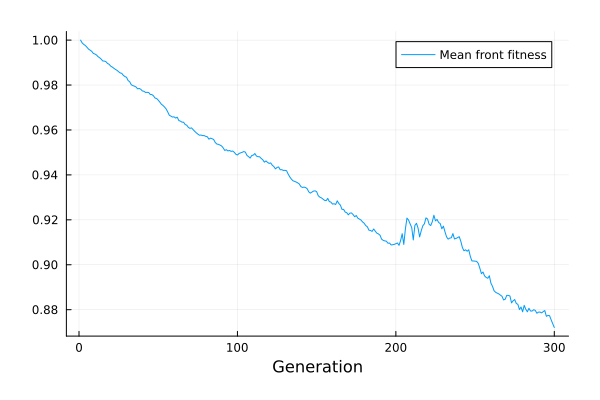

In [7]:
Plots.plot(oneD1_fitn_frontav_mean,xlabel="Generation",label="Mean front fitness")

In [8]:
oneD1_fitnN = norm_onset_mean(oneD1, "fitn")
oneD1_fitnN_frontav = average_front(oneD1_fitnN, N_GENS, X_MAX; oneside=true)
oneD1_fitnN_frontav_mean = timeseries_mean(oneD1_fitnN_frontav, N_GENS)

300-element Vector{Float32}:
 1.0
 0.99874
 0.9980984
 0.99759275
 0.9968463
 0.9960143
 0.9955223
 0.9950448
 0.99409425
 0.9938235
 ⋮
 0.9638979
 0.9645626
 0.9650842
 0.9622408
 0.96270096
 0.9625931
 0.96057475
 0.9586717
 0.956808

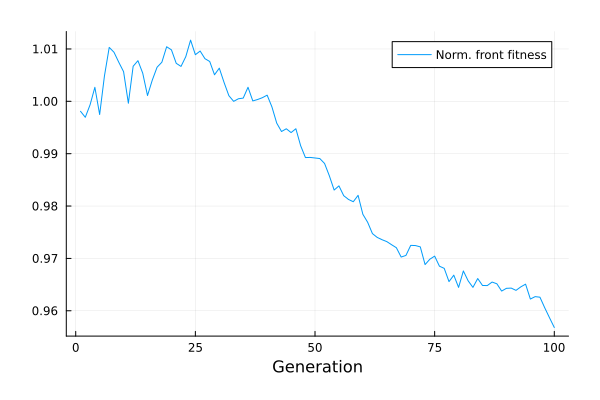

In [9]:
Plots.plot(oneD1_fitnN_frontav_mean[(N_GENS_BURNIN+1):end],xlabel="Generation",label="Norm. front fitness")

In [14]:
oneD2 = deserialize("data/1d/0_nre5_x2F_weightF_noburn.re")
oneD2_fitn_frontav = average_front(oneD2,"fitn";oneside=true)
oneD2_fitn_frontav_mean = timeseries_mean(oneD2_fitn_frontav, N_GENS)
oneD2_fitnN = norm_onset_mean(oneD2, "fitn")
oneD2_fitnN_frontav = average_front(oneD2_fitnN, N_GENS, X_MAX; oneside=true)
oneD2_fitnN_frontav_mean = timeseries_mean(oneD2_fitnN_frontav, N_GENS)

501-element Vector{Float32}:
 1.0
 1.0000014
 0.9997978
 1.0000752
 0.9999255
 0.999925
 1.000085
 0.9998438
 0.9994446
 0.9992092
 ⋮
 0.9545528
 0.95391095
 0.95402443
 0.9539485
 0.95500106
 0.9553644
 0.95483905
 0.95476645
 0.95451117

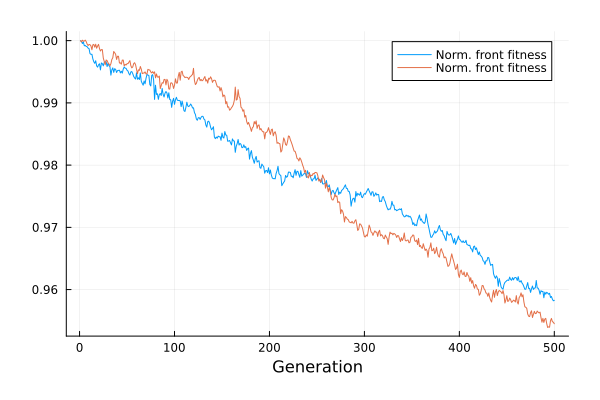

In [15]:
Plots.plot!(oneD2_fitnN_frontav_mean[(N_GENS_BURNIN+1):end],xlabel="Generation",label="Norm. front fitness")

In [12]:
serialize("data/1d/0_nre5_x2F_weightT_noburn.re",oneD1)

In [12]:
using DelimitedFiles
N_RE_PEI2 = 10
pei2_raw = [readdlm("../../study/data/1d/peischl_10k-12k_fit$i") for i in 1:N_RE_PEI2]
pei2_fitn = cat([pei2_raw[i][1:min(N_GENS,size(pei2_raw[1],1)),1:end-1]' for i in 1:N_RE_PEI2]...,dims=3)
toNaN(x) = x < 0 ? NaN : x
pei2_fitn = toNaN.(pei2_fitn)

500×12000×10 Array{Real, 3}:
[:, :, 1] =
   0.999466    0.999457    0.999112  …  12.8796   12.8659   12.8774
   0.999674    0.999492    0.999127     13.1226   13.1396   13.0613
   0.999628    0.999051    0.998442     12.8918   12.8801   12.8656
   0.999635    0.999077    0.998373     13.2094   13.2318   13.2377
   0.999545    0.999149    0.998274     13.3125   13.3006   13.2838
 NaN         NaN         NaN         …  13.4217   13.4584   13.4441
 NaN         NaN         NaN            13.9484   13.8653   13.8319
 NaN         NaN         NaN            14.1709   14.1623   14.1376
 NaN         NaN         NaN            14.3977   14.4268   14.3552
 NaN         NaN         NaN            14.4001   14.3322   14.3462
   ⋮                                 ⋱                      
 NaN         NaN         NaN             3.69798   3.7048    3.704
 NaN         NaN         NaN             3.70403   3.70654   3.70746
 NaN         NaN         NaN             3.68264   3.68263   3.6861
 NaN         N

In [13]:
pei2_fitnN = norm_onset_mean(pei2_fitn,N_GENS_BURNIN)
pei2_fitnN_frontav = average_front(pei2_fitnN,N_GENS,500;oneside=true)
pei2_fitnN_frontav_mean = timeseries_mean(pei2_fitnN_frontav, N_GENS)

12000-element Vector{Float32}:
 0.99957466
 0.99903315
 0.9985555
 0.99826556
 0.99795467
 0.9973506
 0.9971283
 0.99683875
 0.99636525
 0.99610806
 ⋮
 0.48528162
 0.48533726
 0.48521155
 0.48486033
 0.48448873
 0.48462734
 0.48471346
 0.4846414
 0.48441648

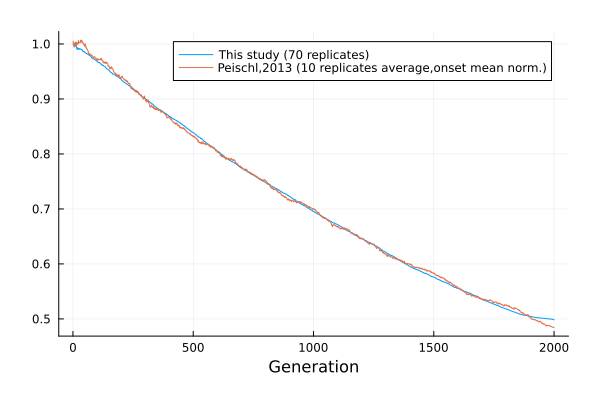

In [14]:
Plots.plot(oneD1_fitnN_frontav_mean[(N_GENS_BURNIN+1):end],xlabel="Generation",label="This study (70 replicates)")
Plots.plot!(pei2_fitnN_frontav_mean[(N_GENS_BURNIN+1):end],xlabel="Generation",label="Peischl,2013 (10 replicates average,onset mean norm.)")

In [15]:
LOCI_N = oneD1["stats"]["n_segr_regions"]
K_CAPACITY = 100
S_SELECT_COEF = 0.005
M_MIG_RATE = 0.05
MUT_RATE = 0.05
MUT_DELETER_RATE = oneD1["stats"]["prop_of_del_muts"]
r_LOG_PROLIF_RATE = log(oneD1["stats"]["r_prolif_rate"])

0.6931471805599453

In [16]:
# Analytical function definitions
# ------------------------------------------------

function N_t(m,r,K,t)
    x_ = (m/2)*K*exp(r*t)
    if x_ >= K
        x_ =  K
    end
    return x_
end

function growth_T(m,r)
    return log(2/m)/r
end

function s_e(s,m,r)
    return s*(m/2)*growth_T(m,r)
end

function x0(s,m,r,K,t)
    x_ = exp(s*(growth_T(m,r)-t))
    x_ /= (exp(s*(growth_T(m,r)-t))+2*N_t(m,r,K,t)-1)
    return x_
end

function u_p_cubic(P,s,m,r,K)
    local myexp = exp(s*growth_T(m,r))
    
    return (3*myexp*(myexp-1)*P-K*m*((myexp-1)*P+1)^3+K*m)/(3*myexp*(myexp-1)-K*m*myexp^3+K*m)
end

h2(s,m,r,K) = sqrt(exp(-s*growth_T(m,r))*K*m) # A* in my PDF
h1(s,m,r) = expm1(s*growth_T(m,r)) # B in my PDF

function u_p(P,s,m,r,K)
    local myh1 = h1(s,m,r)
    local myh2 = h2(s,m,r,K)
    u_ = erf(myh1*myh2*P+myh2)-erf(myh2)
    u_ /= erf(myh1*myh2+myh2)-erf(myh2)
    return u_
end

function u_p_peischl(P,s,m,r,K)
    local mys_e = s_e(s,m,r)
    u_ = expm1(-4*mys_e*K_CAPACITY*P)
    u_ /= expm1(-4*mys_e*K_CAPACITY)
    return u_
end

#= function u_p_alt(P,s,m,r,K)
    myA = s*growth_T(m,r)
    myB = 2/K/m
    u_1 = (-1+0im)^myB * _₂F₁(1,myB,2+myB,1-exp(myA))
    u_ = u_1 / ((P-1+0im)^(1+myB) * exp(-myB*myA) * _₂F₁(myB,1+myB,2+myB,(exp(-myA)-1)*(P-1)) + u_1)
    return u_
end =#
function u_p_alt(P,s,m,r,K)
    myA = expm1(s*growth_T(m,r))
    myB = 2/K/m + 1
    u_ = ((myA*P+1)^myB - 1)/((myA+1)^myB - 1)
    return u_
end

LOCI_N_THEORY = LOCI_N

function large_p(s,m,r,K,t,u,n,phi)
    P_ = 2*N_t(m,K,r,t)*(u/n)*phi*u_p_peischl(x0(s,m,r,K,t),1,m,r,K)
    return P_
end
function large_p_test(s,m,r,K,t,u,n,phi)
    P_ = 2*N_t(m,K,r,t)*(u/n)*phi*u_p_peischl(x0(s,m,r,K,t),s,m,r,K)
    return P_
end
function large_p_test2(s,m,r,K,t,u,n,phi)
    P_ = 2*N_t(m,K,r,t)*(u/n)*phi*u_p(x0(s,m,r,K,t),1,m,r,K)
    return P_
end
function mu_effect(t)
    mu_ = (2*S_SELECT_COEF+S_SELECT_COEF^2)*large_p(S_SELECT_COEF,M_MIG_RATE,r_LOG_PROLIF_RATE,K_CAPACITY,t,MUT_RATE,LOCI_N_THEORY,1-MUT_DELETER_RATE)
    mu_ += (-2*S_SELECT_COEF+S_SELECT_COEF^2)*large_p(-S_SELECT_COEF,M_MIG_RATE,r_LOG_PROLIF_RATE,K_CAPACITY,t,MUT_RATE,LOCI_N_THEORY,MUT_DELETER_RATE)
    return mu_
end
function mu_effect_test(t)
    mu_ = (2*S_SELECT_COEF+S_SELECT_COEF^2)*large_p_test(S_SELECT_COEF,M_MIG_RATE,r_LOG_PROLIF_RATE,K_CAPACITY,t,MUT_RATE,LOCI_N_THEORY,1-MUT_DELETER_RATE)
    mu_ += (-2*S_SELECT_COEF+S_SELECT_COEF^2)*large_p_test(-S_SELECT_COEF,M_MIG_RATE,r_LOG_PROLIF_RATE,K_CAPACITY,t,MUT_RATE,LOCI_N_THEORY,MUT_DELETER_RATE)
    return mu_
end
function mu_effect_test2(t)
    mu_ = (2*S_SELECT_COEF+S_SELECT_COEF^2)*large_p_test2(S_SELECT_COEF,M_MIG_RATE,r_LOG_PROLIF_RATE,K_CAPACITY,t,MUT_RATE,LOCI_N_THEORY,1-MUT_DELETER_RATE)
    mu_ += (-2*S_SELECT_COEF+S_SELECT_COEF^2)*large_p_test2(-S_SELECT_COEF,M_MIG_RATE,r_LOG_PROLIF_RATE,K_CAPACITY,t,MUT_RATE,LOCI_N_THEORY,MUT_DELETER_RATE)
    return mu_
end

function large_p_2015(s,migr,r,K,mut)
    my_4seK = 4*s_e(s,migr,r)*K
    P_ = -mut*my_4seK/expm1(-my_4seK)
    return P_
end
function mu_effect_2015(t)
    mu_ = 2*S_SELECT_COEF*(1-MUT_DELETER_RATE)*large_p_2015(S_SELECT_COEF,M_MIG_RATE,r_LOG_PROLIF_RATE,K_CAPACITY,MUT_RATE)
    mu_ -= 2*S_SELECT_COEF*MUT_DELETER_RATE*large_p_2015(-S_SELECT_COEF,M_MIG_RATE,r_LOG_PROLIF_RATE,K_CAPACITY,MUT_RATE)
    return mu_
end

# Calculate the analytical approximation
# ------------------------------------------------

using QuadGK

function find_mf_theory(start_mf;mu_func=mu_effect)
    my_T = growth_T(M_MIG_RATE,r_LOG_PROLIF_RATE)
    sim_inte_result = quadgk(mu_func,0,my_T)[1]/my_T

    mean_fitness_sim_result = Array{Float64}(undef,0)

    for t_i in 1:N_GENS_BURNIN
        mean_fitness_sim_result = cat(mean_fitness_sim_result,0,dims=1)
    end

    mean_fitness_sim_result = cat(mean_fitness_sim_result,start_mf, dims=1)

    for t_i in (N_GENS_BURNIN+2):N_GENS
        mean_fitness_sim_result = cat(mean_fitness_sim_result,mean_fitness_sim_result[t_i-1]*(1+sim_inte_result)^LOCI_N_THEORY, dims=1)
    end
    return mean_fitness_sim_result
end

find_mf_theory (generic function with 1 method)

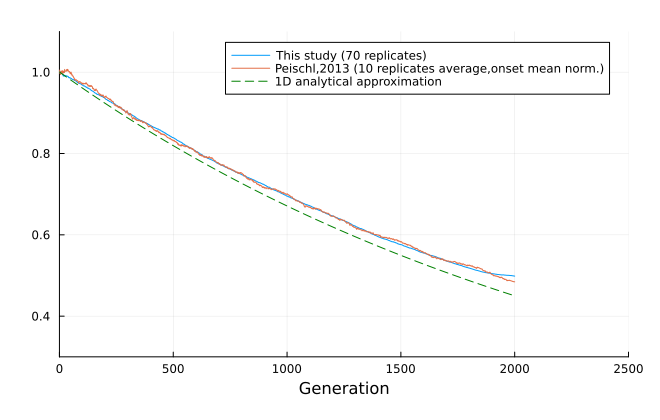

In [17]:
Plots.plot!(find_mf_theory(1;mu_func=mu_effect)[(N_GENS_BURNIN+1):end],label = "1D analytical approximation",color="green",linestyle=:dash,size=(660,420),ylims=(0.3,1.1),xlims=(0,2500))

In [19]:
oneD2 = rangeexp_1d_inf(1,2000,1;x_max_burnin=5,x_max_exp=600,data_to_generate="F",k_capacity=100,r_prolif_rate=2,mut_rate=0.05,migr_rate=0.05,s_sel_coef=0.005)

In [3]:
using DelimitedFiles
N_RE_PEI2 = 4
pei2_raw = [readdlm("data/1d/peischl2_$(i).fitn") for i in 1:N_RE_PEI2]
pei2_fitn = cat([pei2_raw[i][1:min(120,size(pei2_raw[1],1)),1:end-1]' for i in 1:N_RE_PEI2]...,dims=3)
toNaN(x) = x < 0 ? NaN : x
pei2_fitn = toNaN.(pei2_fitn)

59×3×4 Array{Float64, 3}:
[:, :, 1] =
   0.969914    0.971016    0.961729
   0.962293    0.963498    0.965985
   0.960149    0.964574    0.96055
   0.962651    0.959672    0.959961
   0.968853    0.96322     0.961765
 NaN           0.963477    0.965167
 NaN           0.961561    0.961418
 NaN           0.969549    0.963054
 NaN           0.970324    0.96531
 NaN         NaN           0.967571
   ⋮                     
 NaN         NaN         NaN
 NaN         NaN         NaN
 NaN         NaN         NaN
 NaN         NaN         NaN
 NaN         NaN         NaN
 NaN         NaN         NaN
 NaN         NaN         NaN
 NaN         NaN         NaN
 NaN         NaN         NaN

[:, :, 2] =
   0.963981    0.958834    0.946157
   0.961714    0.955789    0.950524
   0.962019    0.96139     0.955032
   0.963892    0.967636    0.960361
   0.968306    0.962384    0.962957
 NaN           0.962658    0.967927
 NaN           0.96194     0.96537
 NaN           0.967109    0.963265
 NaN         NaN 